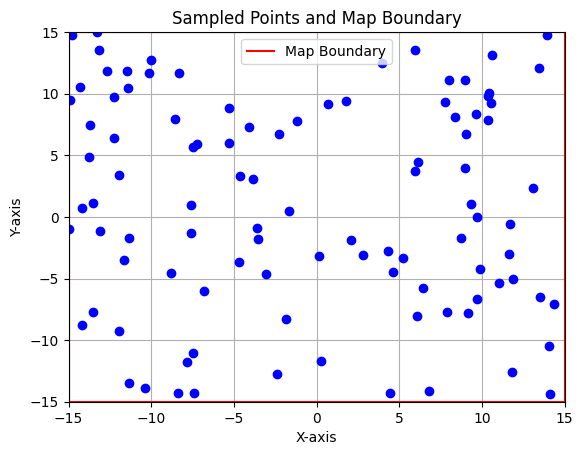

In [50]:
import matplotlib.pyplot as plt
import random
import numpy as np
import matplotlib.pyplot as plt
from shapely import STRtree
from shapely import box
from shapely.geometry.base import BaseGeometry
from shapely import LineString
from shapely import LinearRing
from shapely import Point
from shapely import Polygon


# Define the bounds
x_min, x_max = -15, 15
y_min, y_max = -15, 15

# Number of points to sample
num_points = 100

# Sample points within the bounds
sampled_points = []
for _ in range(num_points):
    x = random.uniform(x_min, x_max)
    y = random.uniform(y_min, y_max)
    sampled_points.append((x, y))

# Plotting the sampled points and the boundary
fig, ax = plt.subplots()
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Plotting the boundary of the map
boundary_x = [x_min, x_max, x_max, x_min, x_min]
boundary_y = [y_min, y_min, y_max, y_max, y_min]
ax.plot(boundary_x, boundary_y, 'r-', label='Map Boundary')  # 'r-' for red line, adjust as needed

# Plotting the sampled points
for point in sampled_points:
    ax.plot(point[0], point[1], 'bo')  # 'bo' for blue dots, adjust as needed

# Show the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sampled Points and Map Boundary')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
def plotPointList(ax,point_list,style='b.'):
    x_coords = [point[0] for point in point_list]  # Extract x coordinates
    y_coords = [point[1] for point in point_list]  # Extract y coordinates
    ax.plot(x_coords,y_coords,style)
    
def plotLine(ax,p1,p2):
    x = [p1[0],p2[0]]
    y = [p1[1],p2[1]]
    ax.plot(x,y,'r-')
def plotPolygon(ax, poly:Polygon):
    coord_s = poly.exterior.coords[0]
    coord_prev = coord_s
    for coord in poly.exterior.coords:
        if coord == coord_prev:
            continue
        # print("coord_prev:{0}".format(coord_prev))
        # print("coord:{0}".format(coord))
        plotLine(ax,p1=coord_prev,p2=coord)
        coord_prev = coord
        
def plot_circle(ax, center, radius):

    # Create a circle
    circle = plt.Circle(center, radius, edgecolor='b', facecolor='none')

    # Plot the circle
    ax.add_patch(circle)

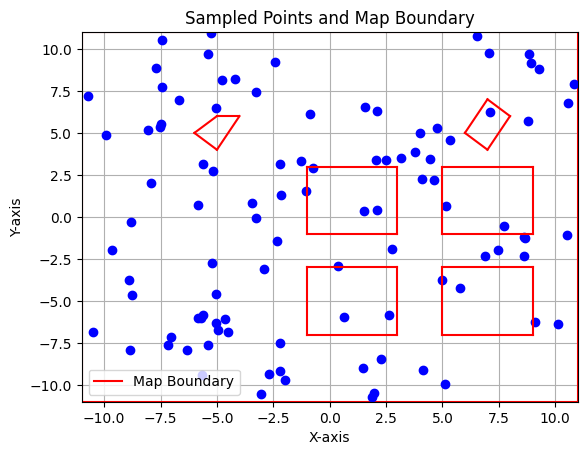

In [52]:
# Define the bounds
x_min, x_max = -11, 11
y_min, y_max = -11, 11

# Number of points to sample
num_points = 100

# Sample points within the bounds
sampled_points = []
for _ in range(num_points):
    x = random.uniform(x_min, x_max)
    y = random.uniform(y_min, y_max)
    sampled_points.append((x, y))

# Plotting the sampled points and the boundary
fig, ax = plt.subplots()
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Plotting the boundary of the map
boundary_x = [x_min, x_max, x_max, x_min, x_min]
boundary_y = [y_min, y_min, y_max, y_max, y_min]
ax.plot(boundary_x, boundary_y, 'r-', label='Map Boundary')  # 'r-' for red line, adjust as needed

# Plotting the sampled points
for point in sampled_points:
    ax.plot(point[0], point[1], 'bo')  # 'bo' for blue dots, adjust as needed

#---------------polygons--------------------------
# <POLYGON ((-1 -7, -1 -3, 3 -3, 3 -7, -1 -7))>
# <POLYGON ((5 -7, 5 -3, 9 -3, 9 -7, 5 -7))>
# <POLYGON ((-1 -1, -1 3, 3 3, 3 -1, -1 -1))>
# <POLYGON ((5 -1, 5 3, 9 3, 9 -1, 5 -1))>
# <POLYGON ((-6 5, -5 6, -4 6, -5 4, -6 5))>
# <POLYGON ((6 5, 7 7, 8 6, 7 4, 6 5))>
polygons = []
coords1 = ((-1, -7), (-1, -3), (3, -3), (3, -7), (-1, -7))
polygons.append(Polygon(coords1))
coords2 = ((5, -7), (5, -3), (9, -3), (9, -7), (5, -7))
polygons.append(Polygon(coords2))
coords3 = ((-1, -1), (-1, 3), (3, 3), (3, -1), (-1, -1))
polygons.append(Polygon(coords3))
coords4 = ((5, -1), (5, 3), (9, 3), (9, -1), (5, -1)) 
polygons.append(Polygon(coords4))
coords5 = ((-6, 5), (-5, 6), (-4, 6), (-5, 4), (-6, 5))
polygons.append(Polygon(coords5))
coords6 = ((6, 5), (7, 7), (8, 6), (7, 4), (6, 5))
polygons.append(Polygon(coords6))
for poly in polygons:
    plotPolygon(ax,poly)
#-----------------------------------------------------------    
# Show the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Sampled Points and Map Boundary')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
# Function to generate Halton sequence for a single dimension
def halton_sequence(size, base):
    sequence = np.zeros(size)
    for i in range(size):
        n, denom = i + 1, 1
        while n > 0:
            denom *= base
            sequence[i] += (n % base) / denom
            n //= base
    return sequence

# Function to scale and shift Halton sequence to a specific range
def scale_halton_sequence(sequence, min_val, max_val):
    return min_val + sequence * (max_val - min_val)

Sample using Halton sequence

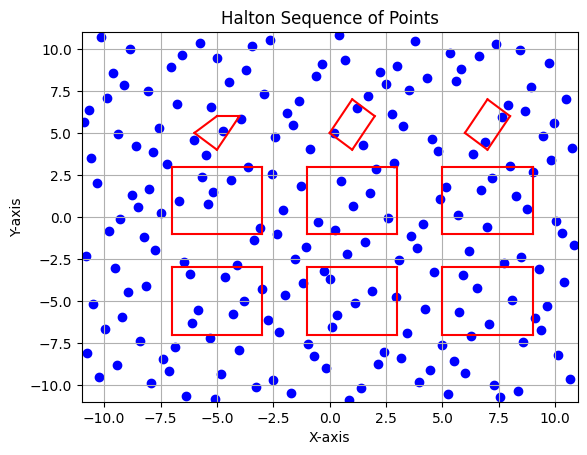

In [54]:
import numpy as np
import matplotlib.pyplot as plt
# Define the bounds
x_min, x_max = -11, 11
y_min, y_max = -11, 11

# Number of points to sample
num_points = 200

# Generate Halton sequences for x and y dimensions (using different prime bases)
x_sequence = halton_sequence(num_points, 2)
y_sequence = halton_sequence(num_points, 3)

# Scale the Halton sequences to the desired range (-15 to 15)
x_coords = scale_halton_sequence(x_sequence, x_min, x_max)
y_coords = scale_halton_sequence(y_sequence, x_min, x_max)

# Plotting the Halton sequence points
fig, ax = plt.subplots()
ax.set_xlim(x_min, x_max)
ax.set_ylim(x_min, x_max)

# Plotting the Halton sequence points
ax.scatter(x_coords, y_coords, color='blue')  # 'blue' color for the points, adjust as needed

#---------------polygons--------------------------
# <POLYGON ((-1 -7, -1 -3, 3 -3, 3 -7, -1 -7))>
# <POLYGON ((5 -7, 5 -3, 9 -3, 9 -7, 5 -7))>
# <POLYGON ((-1 -1, -1 3, 3 3, 3 -1, -1 -1))>
# <POLYGON ((5 -1, 5 3, 9 3, 9 -1, 5 -1))>
# <POLYGON ((-6 5, -5 6, -4 6, -5 4, -6 5))>
# <POLYGON ((6 5, 7 7, 8 6, 7 4, 6 5))>
polygons = []
coords1 = ((-7, -7), (-7, -3), (-3, -3), (-3, -7), (-7, -7))
polygons.append(Polygon(coords1))
coords2 = ((-1, -7), (-1, -3), (3, -3), (3, -7), (-1, -7))#
polygons.append(Polygon(coords2))
coords3 = ((5, -7), (5, -3), (9, -3), (9, -7), (5, -7))#
polygons.append(Polygon(coords3))
coords4 = ((-7, -1), (-7, 3), (-3, 3), (-3, -1), (-7, -1))
polygons.append(Polygon(coords4))
coords5 = ((-1, -1), (-1, 3), (3, 3), (3, -1), (-1, -1))#
polygons.append(Polygon(coords5))
coords6 = ((5, -1), (5, 3), (9, 3), (9, -1), (5, -1))#
polygons.append(Polygon(coords6))
coords7 = ((-6, 5), (-5, 6), (-4, 6), (-5, 4), (-6, 5))#
polygons.append(Polygon(coords7))
coords8 = ((0, 5), (1, 7), (2, 6), (1, 4), (0, 5))
polygons.append(Polygon(coords8))
coords9 = ((6, 5), (7, 7), (8, 6), (7, 4), (6, 5))#
polygons.append(Polygon(coords9))
for poly in polygons:
    plotPolygon(ax,poly)
#-----------------------------------------------------------   

# Show the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Halton Sequence of Points')
plt.grid(True)
plt.show()

In [55]:
tree = STRtree(polygons)

points_safe = []
points = list(zip(x_coords, y_coords))
r = 0.5
for point in points:
    index_query, distance = tree.query_nearest(Point(point), return_distance=True)
    if(distance[distance<=r].size==0):
        points_safe.append(point)




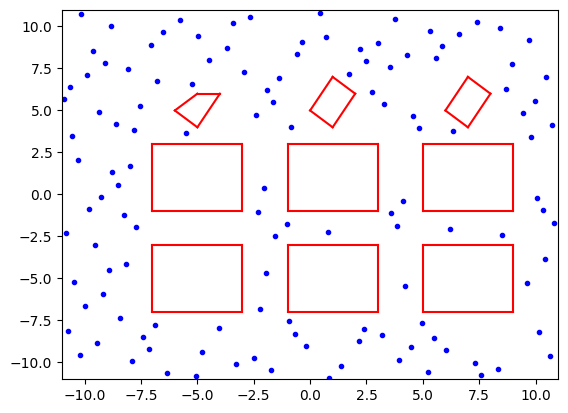

In [56]:
# Define the bounds
x_min, x_max = -11, 11
y_min, y_max = -11, 11
# Plotting the Halton sequence points
fig, ax = plt.subplots()
ax.set_xlim(x_min, x_max)
ax.set_ylim(x_min, x_max)

for poly in polygons:
    plotPolygon(ax,poly)
plotPointList(ax,points_safe)

Algorithm: Fast Marching Tree

In [57]:
#--------Define Data Structure necessary for the Algorithm-----------------
from typing import Optional, TypeVar, Set, Mapping, Tuple, List
import queue
from pqdict import  pqdict
class Node:
    def __init__(self, x,y):
        self.id = None
        self.pos = (x,y)
        self.costToTerminal = 0.0
        self.parent:Node = None
        self.childrens:List[Node] = []
        
class SampleSet:
    def __init__(self) -> None:
        pass
    
    
def manhattan_distance(p1, p2):
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    return abs(x1 - x2) + abs(y1 - y2)         
def norm(p1, p2):
    d = np.linalg.norm(np.array(p1) - np.array(p2))
    return d
idToNodeDict:dict[int:Node]={}
posTupleToID:dict[Tuple:int]={}
       
        

In [58]:
from shapely import geometry as geo
from shapely import wkt 
from shapely import ops
import numpy as np 
import networkx as nx
def neighbourPointsQuery_shapely(query_point_shapely:Point, r:float, pointsSet_shapely:List[Point])-> List[Point]:
    query_circle = query_point_shapely.buffer(r)
    Neighbour_mask = query_circle.contains(pointsSet_shapely)
    points_nparray = np.array(pointsSet_shapely,dtype=object)
    Neighbour_points = points_nparray[Neighbour_mask]
    return Neighbour_points
def shapelyPointListToListTuple(pointsList_shapely:List[Point])->List[Tuple]:
    tupleList = []
    for point_shapely in pointsList_shapely:
        tupleList.append((point_shapely.x,point_shapely.y))
    return tupleList
def shapelyPointListToListID(pointsList_shapely:List[Point])->List[int]:
    idList = []
    for point_shapely in pointsList_shapely:
        position = (point_shapely.x,point_shapely.y)
        id = posTupleToID[position]
        idList.append(id)
    return idList

In [59]:
def lineSegmentToShapelyPointList(p1,p2,step=0.1):
    ps = np.array([p1[0],p1[1]])
    pe = np.array([p2[0],p2[1]])
    vec_se = pe-ps
    dis = np.linalg.norm(pe-ps)
    vec_se_norm = vec_se/dis
    i = 0
    pointList_s = []
    while i * step <= dis:
        pointList_s.append(Point(ps + i * step * vec_se_norm))
        i = i + 1
    return pointList_s

128


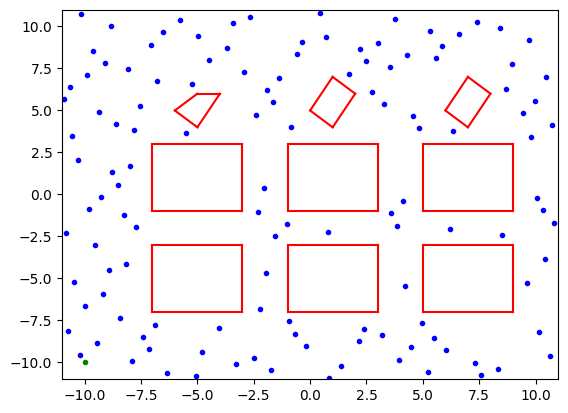

search Fail


In [60]:
# Define the bounds
x_min, x_max = -11, 11
y_min, y_max = -11, 11
# Plotting the Halton sequence points
fig, ax = plt.subplots()
ax.set_xlim(x_min, x_max)
ax.set_ylim(x_min, x_max)

for poly in polygons:
    plotPolygon(ax,poly)
plotPointList(ax,points_safe)




#------------initialization------------------
points_safe_shapely = []
for point in points_safe:
    points_safe_shapely.append(Point(point))

#set initial and goal position    
p_init = (-10,-10)
p_goal = ( 10, 10)

#---initialize containers--
V : dict = {}
V_unvisited:List[int] = []
V_closed:List[int] = []
G = nx.Graph()


#initialize initial node
Node_init = Node(p_init[0],p_init[1])
Node_init.costToTerminal = manhattan_distance(Node_init.pos,p_goal)
Node_init.id = 0
idToNodeDict[Node_init.id] = Node_init
posTupleToID[p_init] = Node_init.id
G.add_node(Node_init.id)

i = 0
for point in points_safe:
    i=i+1
    node = Node(point[0],point[1]) 
    disToGoal = manhattan_distance(point,p_goal)
    #----------initialize node attributes---------------------
    # print(i)
    node.id = i
    node.costToTerminal = disToGoal
    #---------------------------------------------------------
    V[node.id] = node
    idToNodeDict[node.id] = node
    posTupleToID[point] = node.id
    V_unvisited.append(node.id)
    G.add_node(node.id)

    

    

#initialize goal node
Node_goal = Node(p_goal[0], p_goal[1])
Node_goal.costToTerminal = 0
Node_goal.id = i+1
idToNodeDict[Node_goal.id] = Node_goal
posTupleToID[p_goal] =Node_goal.id
G.add_node(Node_goal.id)
print(Node_goal.id)

#add initial and goal point to points_safe and points_safe_shapely
points_safe.append(p_init)
points_safe.append(p_goal)
points_safe_shapely.append(Point(p_init))
points_safe_shapely.append(Point(p_goal))

#---initialize containers--
V_open = pqdict()#key:id ; value: cost to goal
V_open[Node_init.id] = Node_init.costToTerminal

r_neighbour = 3
#----------------visualization-----------------
# Draw the initial graph

#----------------------------------------------

while len(V_open) != 0:
    z_id = V_open.top()  # 2:Find lowest-cost node z in V_open
    z = idToNodeDict[z_id]
    N_z_shapely = neighbourPointsQuery_shapely(
        query_point_shapely=Point(z.pos),
        r=r_neighbour,
        pointsSet_shapely=points_safe_shapely,
    )
    N_z_id = shapelyPointListToListID(N_z_shapely)
    X_sets_id = list(set(N_z_id) & set(V_unvisited))
    # ----------------visualization-----------------
    plotPointList(ax, [z.pos], style="g.")
    plt.show()
    # ----------------------------------------------
    for x_id in X_sets_id:  # 3: For each of z's neighbours x in V_unvisited
        x = idToNodeDict[x_id]
        # ----------------visualization-----------------
        plotPointList(ax, [x.pos], style="bo")
        plt.show()
        # ----------------------------------------------
        N_x_shapely = neighbourPointsQuery_shapely(
            query_point_shapely=Point(x.pos),
            r=r_neighbour,
            pointsSet_shapely=points_safe_shapely,
        )
        N_x_id = shapelyPointListToListID(N_x_shapely)
        Y_sets_id = list(
            set(N_x_id) & set(V_open)
        )  # 4. Find Neighbour of Node x, also in V_open,  denoted as Y
        # ------------optimal method 1---------------
        Y_sets_cost = [
            V_open[y_id] for y_id in Y_sets_id
        ]  # Note: What is locally optimal?
        # -----------optimal method 2------------
        # Y_sets_cost = [idToNodeDict[y].costToTerminal for y in Y_sets_id]
        # -----------------------------------------
        y_min_id = Y_sets_id[
            np.argmin(Y_sets_cost)
        ]  # 5. Find locally-optimal one-step connection to x from among nodes y
        y_min = idToNodeDict[y_min_id]

        # ----------------visualization-----------------
        plotPointList(ax, [y_min.pos], style="go")
        plt.show()
        # ----------------------------------------------
        # 6. if that connection is collision-free add it to tree of path
        segment_shapely_PointList = lineSegmentToShapelyPointList(
            p1=x.pos, p2=y_min.pos
        )
        _, distance = tree.query_nearest(
            segment_shapely_PointList, return_distance=True
        )
        if distance[distance <= r].size == 0:
            # no collision, add this edge to the graph
            # G.add_edge(x_id, y_min_id)
            # set y_min node as parent of x
            x.parent = y_min
            y_min.childrens.append(x)
            # ----------------visualization-----------------
            plotLine(ax=ax, p1=x.pos, p2=y_min.pos)
            plt.show()
            # ----------------------------------------------
            # 7. remove successfully connected nodes x from V_unvisited and add them to V_open
            V_unvisited.remove(x_id)
            # ------update cost Method1-----------
            # V_open[x_id] = x.costToTerminal
            # Notes: we can update it in different way
            # ------------------------------------
            # --------update cost Method2--------
            V_open[x_id] = (
                V_open[y_min_id] + norm(y_min.pos, x.pos) + x.costToTerminal
            )
            # ----------------visualization-----------------
            plotPointList(ax, [x.pos], style="g.")
            plt.show()
            # ----------------------------------------------

    # 8:Remove z from V_open and add it to V_closed
    V_open.pop(z_id)
    V_closed.append(z_id)
    # ----------------visualization-----------------
    plotPointList(ax, [z.pos], style="ko")
    plt.show()
    # ----------------------------------------------

    # 9: Repeat until either:(1)V_open is empty->report failure(2)lowesr-cost node z in V_open is in X_goal return unique path to z and erport success
    if len(V_open) == 0:
        print("search Fail")
        break
    if idToNodeDict[V_open.top()].costToTerminal < 0.4:
        z_id = V_open.pop()
        V_closed.append(z_id)
        # ----------------visualization-----------------
        plotPointList(ax, [z.pos], style="ko")
        plt.show()
        # ----------------------------------------------
        print("search Success")

        node_final = idToNodeDict[z_id]
        node = node_final
        path = []
        while node.id != 0:
            # -------------visualization---------
            print(node.id)
            plotPointList(ax, [node.pos], style="go")
            # --------------------------------
            path = [node.pos] + path
            node = node.parent

        path = [node.pos] + path
        # -------------visualization---------
        plotPointList(ax, [node.pos], style="go")
        print(node.id)
        print(path)
        # -----------------------------------

        break
    
            
            
        
    
    
    

  

 
#--------------------------------------------


Function for querying neighbouring points

In [61]:
from shapely import geometry as geo
from shapely import wkt 
from shapely import ops
import numpy as np 

def neighbourPointsQuery_shapely(query_point_shapely:Point, r:float, pointsSet_shapely:List[Point])-> List[Point]:
    query_circle = query_point_shapely.buffer(r)
    Neighbour_mask = query_circle.contains(pointsSet_shapely)
    points_nparray = np.array(pointsSet_shapely,dtype=object)
    Neighbour_points = points_nparray[Neighbour_mask]
    return Neighbour_points
def shapelyPointListToListTuple(pointsList_shapely:List[Point])->List[Tuple]:
    tupleList = []
    for point_shapely in pointsList_shapely:
        tupleList.append((point_shapely.x,point_shapely.y))
    return tupleList
def pointListTupleToShapelyPointList(pointList_tuple:List[Tuple])->List[Point]:
    List_shaplely = []
    for point_tuple in pointList_tuple:
        List_shaplely.append(Point(point_tuple))
    return List_shaplely
    
            
    
     
    

Test Shapely Packages ,Test neighbourPointsQuery_shapely

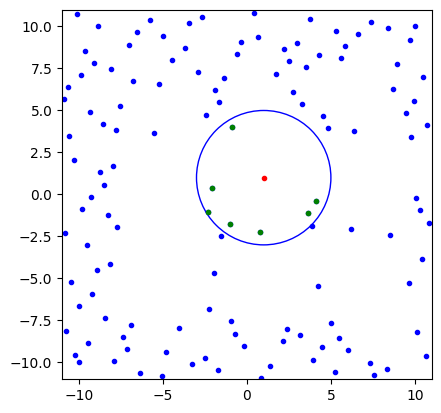

In [62]:
from shapely import geometry as geo
from shapely import wkt 
from shapely import ops
import numpy as np 

query_point = (1,1)
# c1 = Point(query_point_shapely).buffer(4)
# N_x_mask = c1.contains(points_safe_shapely)
# print("N_x_mask:{0}".format(N_x_mask))
# print("points_safe:{0}".format(points_safe))
# points_safe_nparray = np.array(points_safe,dtype=object)
# N_x = points_safe_nparray[N_x_mask]
N_x_shapely = neighbourPointsQuery_shapely(Point(query_point),4,points_safe_shapely)
N_x = shapelyPointListToListTuple(N_x_shapely)

# Define the bounds
x_min, x_max = -11, 11
y_min, y_max = -11, 11
# Plotting the Halton sequence points
fig, ax = plt.subplots()
ax.set_xlim(x_min, x_max)
ax.set_ylim(x_min, x_max)
plotPointList(ax,[query_point],style='r.')
plotPointList(ax,points_safe)
plotPointList(ax,N_x,style='g.')
plot_circle(ax,center=query_point, radius=4)
ax.set_aspect('equal')

In [63]:
V = pqdict({(1,1):1,(2,2):2,(3,3):0})
L = []
L.append((1,1))
M = list(set(L) & set(V))

del V[(1,1)]
print(V)

V[(5,5)]=3
print(V)

V.pop((2,2))
print(V)

pqdict((3, 3): 0, (2, 2): 2)
pqdict((3, 3): 0, (2, 2): 2, (5, 5): 3)
pqdict((3, 3): 0, (5, 5): 3)


In [64]:
p1 = (1.0,0.0)
p2 = (5.0,0.0)
pointList_s = lineSegmentToShapelyPointList(p1,p2)
print(pointList_s)

[<POINT (1 0)>, <POINT (1.1 0)>, <POINT (1.2 0)>, <POINT (1.3 0)>, <POINT (1.4 0)>, <POINT (1.5 0)>, <POINT (1.6 0)>, <POINT (1.7 0)>, <POINT (1.8 0)>, <POINT (1.9 0)>, <POINT (2 0)>, <POINT (2.1 0)>, <POINT (2.2 0)>, <POINT (2.3 0)>, <POINT (2.4 0)>, <POINT (2.5 0)>, <POINT (2.6 0)>, <POINT (2.7 0)>, <POINT (2.8 0)>, <POINT (2.9 0)>, <POINT (3 0)>, <POINT (3.1 0)>, <POINT (3.2 0)>, <POINT (3.3 0)>, <POINT (3.4 0)>, <POINT (3.5 0)>, <POINT (3.6 0)>, <POINT (3.7 0)>, <POINT (3.8 0)>, <POINT (3.9 0)>, <POINT (4 0)>, <POINT (4.1 0)>, <POINT (4.2 0)>, <POINT (4.3 0)>, <POINT (4.4 0)>, <POINT (4.5 0)>, <POINT (4.6 0)>, <POINT (4.7 0)>, <POINT (4.8 0)>, <POINT (4.9 0)>, <POINT (5 0)>]


In [65]:
np.linalg.norm(np.array((1,1))-np.array((2,2)))

1.4142135623730951

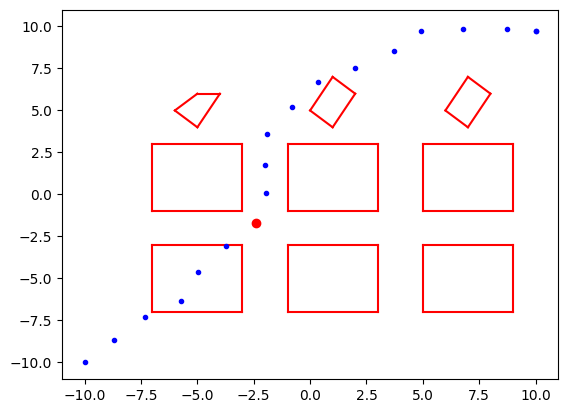

In [66]:
path_points =[(-10, -10), (-8.7119140625, -8.66620941929584), (-7.34228515625, -7.284712696235331), (-5.73095703125, -6.319006249047402), (-4.9736328125, -4.6223136716963875), (-3.73828125, -3.0932784636488346), (-2.4169921875, -1.6849565614997708), (-1.9658203125, 0.08550525834476197), (-1.998046875, 1.7754915409236407), (-1.9013671875, 3.6264288980338364), (-0.81103515625, 5.209114464258498), (0.365234375, 6.714677640603565), (2.0087890625, 7.519433013260169), (3.716796875, 8.52537722908093), (4.92529296875, 9.705685108977292), (6.7783203125, 9.873342478280748), (8.744140625, 9.83310470964792), (10.0009765625, 9.752629172382257), (10.0009765625, 9.752629172382257)]
# Define the bounds
x_min, x_max = -11, 11
y_min, y_max = -11, 11
# Plotting the Halton sequence points
fig, ax = plt.subplots()
ax.set_xlim(x_min, x_max)
ax.set_ylim(x_min, x_max)

for poly in polygons:
    plotPolygon(ax,poly)
plotPointList(ax,path_points)
plotPointList(ax,point_list=[(-2.4169921875, -1.6849565614997708)],style='ro')

Extract path that have path point explode

In [67]:
path_points_shapely = pointListTupleToShapelyPointList(path_points)
for point_shapely in path_points_shapely:
    # print("query_point:{0}".format(point_shapely))
    N_x_shapely = neighbourPointsQuery_shapely(Point(point_shapely),1,path_points_shapely)
    # print(N_x_shapely)
    print(len(N_x_shapely))
    

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
